In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import random

np.random.seed(29)  # For numpy numbers
random.seed(29)   # For Python

In [10]:
def extract_file_paths(path):
    image_filenames = []
    for root, dirs, files in os.walk(path):
        if len(files) > 0:
            for file in files:
                if(file[-3:] == "png" or file[-3:] == "PNG"):
                    image_filenames.append(str(root)+os.sep+str(file))
    print(len(image_filenames))
    return image_filenames


In [12]:
image_filenames = extract_file_paths("C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/Original Data/train")

species = []
for image in image_filenames:
    path = os.path.dirname(image)
    base = os.path.basename(path)
    species.append(base)

species_count = [[x,species.count(x)] for x in set(species)]
species_df = pd.DataFrame(species_count, columns=["Species", "Count"])
print(species_df)
#species_df.to_csv("Augmentation.csv")

4750
                      Species  Count
0                       Maize    221
1                 Black-grass    263
2   Small-flowered Cranesbill    496
3             Shepherds Purse    231
4            Loose Silky-bent    654
5                  Sugar beet    385
6           Scentless Mayweed    516
7                    Cleavers    287
8            Common Chickweed    611
9                     Fat Hen    475
10               Common wheat    221
11                   Charlock    390


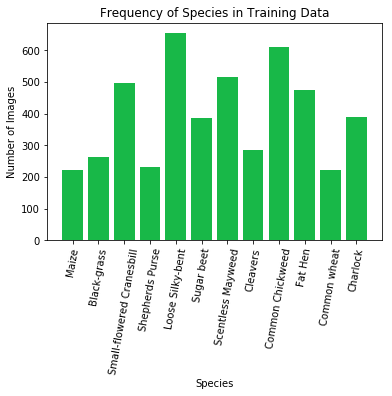

In [7]:
plt.bar(species_df.Species, species_df.Count, color = '#18B848')
plt.title("Frequency of Species in Training Data")
plt.xlabel("Species")
plt.ylabel("Number of Images")
plt.xticks(rotation = 80)
plt.show()

In [ ]:
species_list = []
height = []
width = []

for image in image_filenames:
    img = cv2.imread(image)
    path = os.path.dirname(image)
    base = os.path.basename(path)
    species_list.append(base)
    height.append(img.shape[0])
    width.append(img.shape[1])


In [ ]:
image_dim = {"Species": species_list, "Height": height, "Width": width}
image_dim_df = pd.DataFrame(image_dim, columns = ["Species", "Height", "Width"])


In [ ]:
image_dim_df.groupby('Species').quantile([0, 0.25, 0.5, 0.75, 1])

In [ ]:
sns.distplot(height, hist=True, kde=True, bins=50, color = 'darkblue', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})

plt.title('Image Height Distribution')
plt.xlabel('Image Height')
plt.ylabel('Density')
plt.show()

In [ ]:
### Creating Validation Folders and Dataset ###

validpath = r'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/validation' 
if not os.path.exists(validpath):
    os.makedirs(validpath)
testpath = r'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/test' 
if not os.path.exists(testpath):
    os.makedirs(testpath)
for i in set(species):
    path = 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/validation/{}'.format(i)
    if not os.path.exists(path):
        os.makedirs(path) 
for i in set(species):
    path = 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/test/{}'.format(i)
    if not os.path.exists(path):
        os.makedirs(path) 

In [7]:
path = 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train'
roots = []
for root, dirs, files in os.walk(path):
    roots.append(root)
    
print(roots[1:])

# for root in roots[1:]:  
#     images = []
#     for root, dirs, files in os.walk(root):
#         for file in files:
#             images.append(str(root)+os.sep+str(file))
#     random.shuffle(images)
#     valid_images = images[:int(0.15 * len(images))]
#     print(len(valid_images))
#     for image in valid_images:
#         split_im = image.split("train",1)
#         os.rename(image, split_im[0]+'validation'+split_im[1])

# for root in roots[1:]:  
#     images = []
#     for root, dirs, files in os.walk(root):
#         for file in files:
#             images.append(str(root)+os.sep+str(file))
#     random.shuffle(images)
#     test_images = images[:int(0.25 * len(images))]
#     print(len(test_images))
#     for image in test_images:
#         split_im = image.split("train",1)
#         os.rename(image, split_im[0]+'test'+split_im[1])

print(set(species))

['C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Black-grass', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Charlock', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Cleavers', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Common Chickweed', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Common wheat', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Fat Hen', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Loose Silky-bent', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Maize', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Scentless Mayweed', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Shepherds Purse', 'C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train\\Small-f

In [11]:
extract_file_paths("C:/Users/sjcrum/Documents/GitHub/Plant-Image-Recognition/PlantImages/train")

species = []
for image in image_filenames:
    path = os.path.dirname(image)
    base = os.path.basename(path)
    species.append(base)

species_count = [[x,species.count(x)] for x in set(species)]
species_df = pd.DataFrame(species_count, columns=["Species", "Count"])
print(species_df)

32446
                      Species  Count
0            Common Chickweed   3117
1             Shepherds Purse   2357
2   Small-flowered Cranesbill   2530
3                  Sugar beet   2946
4                    Cleavers   2928
5                 Black-grass   2683
6                    Charlock   2984
7                       Maize   2255
8           Scentless Mayweed   2632
9                     Fat Hen   2423
10           Loose Silky-bent   3336
11               Common wheat   2255
